In [44]:
import urllib.request, json 
import array
import re
from datetime import date 
import matplotlib.pyplot as plt

In [2]:
raw_data_Link = 'https://api.covid19india.org/raw_data.json'
def getJsonfromUrl(link):
    with urllib.request.urlopen(raw_data_Link) as url:
        raw_data = json.loads(url.read().decode())
    return raw_data

In [3]:
def preProcessAgeGroup(data):    
    pattern = re.compile("([0-9]*)-([0-9]*)")
    for element in data['raw_data']:
        if element['agebracket']:
            res = pattern.findall(element['agebracket'])
            if len(res) > 0:
                avgAge = int((int(res[0][0]) + int(res[0][1]))/2)
                element['agebracket'] = avgAge
            else:
                element['agebracket'] = int(element['agebracket'])
    return data

In [24]:
def getDayDifference(beforeDate,afterDate):
    dayDifference = 0
    pattern = re.compile("([0-9][0-9])/([0-9][0-9])/([0-9][0-9][0-9][0-9])")
    resBeforeDate = pattern.findall(beforeDate)
    resAfterDate = pattern.findall(afterDate)
    bdate = date(int(resBeforeDate[0][2]), int(resBeforeDate[0][1]), int(resBeforeDate[0][0])) 
    adate = date(int(resAfterDate[0][2]), int(resAfterDate[0][1]), int(resAfterDate[0][0]))
    return (adate-bdate).days
    

In [51]:
def getRecoveryTimewrtAgeGroup():
    data = getJsonfromUrl(raw_data_Link)
    data = preProcessAgeGroup(data)
    CumulativeRecoveryTimeToAgeGroup = array.array('i',[0]*10)
    NoOfPeopleRecoveredInAAgeGroup = array.array('i',[0]*10)
    recTimewrtAgeGroup = []
    for element in data['raw_data']:
            if element['agebracket'] and element['currentstatus'] == 'Recovered':
                ageGroup = int(element['agebracket'] / 10)
                dayDifference = getDayDifference(element['dateannounced'],element['statuschangedate'])
                if (dayDifference > 0):
                    NoOfPeopleRecoveredInAAgeGroup[ageGroup] += 1
                    CumulativeRecoveryTimeToAgeGroup[ageGroup] += dayDifference            
    for (cumRecTime,countOfPeople) in zip(CumulativeRecoveryTimeToAgeGroup,NoOfPeopleRecoveredInAAgeGroup):
        if countOfPeople > 0:
            recTimewrtAgeGroup.append(round((cumRecTime/countOfPeople),2))
        else:
            recTimewrtAgeGroup.append(-1)
    return recTimewrtAgeGroup

In [49]:
def plot(arr,xLabel=None,yLabel=None,title=None,imageFileName=None):
    
    x = [i for i in range(0,10)]
    print("x axis length:{}".format(len(x)))
    tick_label = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'] 

    # plotting a bar chart 
    plt.bar(x, arr, tick_label = tick_label, 
            width = 0.6)
    plt.plot(x, arr, color='green', linestyle='dashed', linewidth = 1, 
             marker='o', markersize=6)

    for i,j in zip(x,arr):
        plt.annotate(str(j),xy=(i-0.2,j+1))

    plt.ylim(0,max(arr) + 20)

    if xLabel:
        plt.xlabel(xLabel)
    else: 
        plt.xlabel('Age group') 
    
    if yLabel:
        plt.ylabel(yLabel)
    else:
        plt.ylabel('Recovery Time') 

    if title:
        plt.title(title)
    else:
        plt.title('Age group to recovery time by COVID-19')
    
    if imageFileName:
        plt.savefig(imageFileName+".png")
    else:
        plt.savefig('recoveryTimeWrtAgeGroup.png')
    # function to show the plot 
    plt.show() 

In [42]:
def plotRecTimeWrtAgeGroup():
    recTimewrtAgeGroup = getRecoveryTimewrtAgeGroup()
    print("To plot y size:{}".format(len(recTimewrtAgeGroup)))
    plot(recTimewrtAgeGroup)

20
45
24
69
55
55
55
55
55
55
55
55
55
55
55
55
55
55
70
45
16
27
59
65
75
45
24
54
53
65
61
25
63
3
48
40
13
96
89
3
85
46
70
68
27
69
26
76
65
45
33
33
27
37
59
43
21
24
59
46
32
45
47
42
33
3
44
51
31
29
20
67
63
49
26
68
52
22
18
34
28
25
22
56
25
27
44
20
68
35
21
50
67
33
30
3
38
23
22
49
35
24
24
21
70
47
32
21
51
19
65
22
22
32
22
69
58
24
38
20
22
34
47
37
35
20
41
18
69
27
26
52
21
52
27
2
63
32
59
45
22
24
27
60
32
53
20
23
42
74
28
59
63
41
24
26
32
38
67
26
53
39
19
35
33
69
75
65
35
34
45
40
17
36
60
54
21
35
23
57
59
22
24
31
30
33
32
30
21
60
64
35
25
38
24
81
26
58
27
32
41
33
26
34
23
23
50
22
32
24
41
27
69
21
64
36
27
51
37
62
48
47
20
53
64
43
49
36
46
45
58
57
27
29
24
33
49
46
61
85
21
30
23
21
20
25
56
32
49
24
30
31
41
34
40
37
47
34
21
50
32
27
33
32
27
34
52
26
61
56
38
41
30
24
60
22
38
45
45
69
2
25
25
48
54
24
35
41
23
32
40
65
56
65
53
54
58
74
52
25
49
39
61
56
47
55
65
57
47
57
70
23
25
65
55
25
64
36
75
57
65
36
50
57
27
39
38
63
34
21
22
23
37
37
63
5

ValueError: shape mismatch: objects cannot be broadcast to a single shape

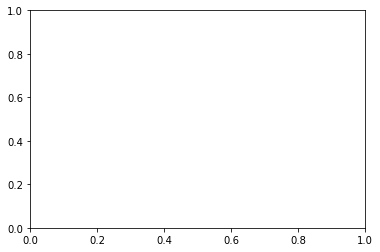

In [55]:
plotRecTimeWrtAgeGroup()

In [62]:
gender = ['M','F']
def getRecoveryTimewrtGender():
    data = getJsonfromUrl(raw_data_Link)
    data = preProcessAgeGroup(data)
    CumulativeRecoveryTimeToGender = array.array('i',[0]*2)
    NoOfPeopleRecoveredTogender = array.array('i',[0]*2)
    recTimewrtAgeGroup = []
    for element in data['raw_data']:
            if element['gender'] and element['currentstatus'] == 'Recovered':
                dayDifference = getDayDifference(element['dateannounced'],element['statuschangedate'])
                if (dayDifference > 0):
                    NoOfPeopleRecoveredTogender[gender.index(element['gender'])] += 1
                    CumulativeRecoveryTimeToGender[gender.index(element['gender'])] += dayDifference
    print("Recovery Time wrt Gender:{} People in a Gender:{}".format(CumulativeRecoveryTimeToGender,NoOfPeopleRecoveredTogender))
    for (cumRecTime,countOfPeople) in zip(CumulativeRecoveryTimeToGender,NoOfPeopleRecoveredTogender):
        if countOfPeople > 0:
            recTimewrtAgeGroup.append(round((cumRecTime/countOfPeople),2))
        else:
            recTimewrtAgeGroup.append(-1)
    return recTimewrtAgeGroup

In [74]:
def plot(arr,xLabel=None,yLabel=None,title=None,imageFileName=None):
    
    x = [i for i in range(0,2)]
    
    tick_label = ['M', 'F'] 

    # plotting a bar chart 
    plt.bar(x, arr, tick_label = tick_label, 
            width = 0.3)
    plt.plot(x, arr, color='green', linestyle='dashed', linewidth = 1, 
             marker='o', markersize=6)

    for i,j in zip(x,arr):
        plt.annotate(str(j),xy=(i,j+1))

    plt.ylim(0,max(arr) + 20)

    if xLabel:
        plt.xlabel(xLabel)
    else: 
        plt.xlabel('Gender') 
    
    if yLabel:
        plt.ylabel(yLabel)
    else:
        plt.ylabel('Recovery Time') 

    if title:
        plt.title(title)
    else:
        plt.title('Gender to recovery time by COVID-19')
    
    if imageFileName:
        plt.savefig(imageFileName+".png")
    else:
        plt.savefig('recoveryTimeWrtGender.png')
    # function to show the plot 
    plt.show() 

In [56]:
def plotRecTimeWrtGender():
    recTimewrtGender = getRecoveryTimewrtGender()
    plot(recTimewrtGender)

20
45
24
69
55
55
55
55
55
55
55
55
55
55
55
55
55
55
70
45
16
27
59
65
75
45
24
54
53
65
61
25
63
3
48
40
13
96
89
3
85
46
70
68
27
69
26
76
65
45
33
33
27
37
59
43
21
24
59
46
32
45
47
42
33
3
44
51
31
29
20
67
63
49
26
68
52
22
18
34
28
25
22
56
25
27
44
20
68
35
21
50
67
33
30
3
38
23
22
49
35
24
24
21
70
47
32
21
51
19
65
22
22
32
22
69
58
24
38
20
22
34
47
37
35
20
41
18
69
27
26
52
21
52
27
2
63
32
59
45
22
24
27
60
32
53
20
23
42
74
28
59
63
41
24
26
32
38
67
26
53
39
19
35
33
69
75
65
35
34
45
40
17
36
60
54
21
35
23
57
59
22
24
31
30
33
32
30
21
60
64
35
25
38
24
81
26
58
27
32
41
33
26
34
23
23
50
22
32
24
41
27
69
21
64
36
27
51
37
62
48
47
20
53
64
43
49
36
46
45
58
57
27
29
24
33
49
46
61
85
21
30
23
21
20
25
56
32
49
24
30
31
41
34
40
37
47
34
21
50
32
27
33
32
27
34
52
26
61
56
38
41
30
24
60
22
38
45
45
69
2
25
25
48
54
24
35
41
23
32
40
65
56
65
53
54
58
74
52
25
49
39
61
56
47
55
65
57
47
57
70
23
25
65
55
25
64
36
75
57
65
36
50
57
27
39
38
63
34
21
22
23
37
37
63
5

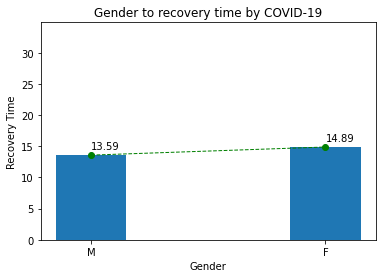

In [75]:
plotRecTimeWrtGender()

20
45
24
69
55
55
55
55
55
55
55
55
55
55
55
55
55
55
70
45
16
27
59
65
75
45
24
54
53
65
61
25
63
3
48
40
13
96
89
3
85
46
70
68
27
69
26
76
65
45
33
33
27
37
59
43
21
24
59
46
32
45
47
42
33
3
44
51
31
29
20
67
63
49
26
68
52
22
18
34
28
25
22
56
25
27
44
20
68
35
21
50
67
33
30
3
38
23
22
49
35
24
24
21
70
47
32
21
51
19
65
22
22
32
22
69
58
24
38
20
22
34
47
37
35
20
41
18
69
27
26
52
21
52
27
2
63
32
59
45
22
24
27
60
32
53
20
23
42
74
28
59
63
41
24
26
32
38
67
26
53
39
19
35
33
69
75
65
35
34
45
40
17
36
60
54
21
35
23
57
59
22
24
31
30
33
32
30
21
60
64
35
25
38
24
81
26
58
27
32
41
33
26
34
23
23
50
22
32
24
41
27
69
21
64
36
27
51
37
62
48
47
20
53
64
43
49
36
46
45
58
57
27
29
24
33
49
46
61
85
21
30
23
21
20
25
56
32
49
24
30
31
41
34
40
37
47
34
21
50
32
27
33
32
27
34
52
26
61
56
38
41
30
24
60
22
38
45
45
69
2
25
25
48
54
24
35
41
23
32
40
65
56
65
53
54
58
74
52
25
49
39
61
56
47
55
65
57
47
57
70
23
25
65
55
25
64
36
75
57
65
36
50
57
27
39
38
63
34
21
22
23
37
37
63
5

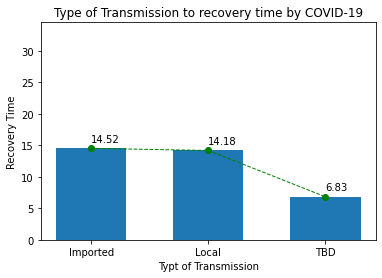

In [82]:
tot = ['Imported', 'Local', 'TBD']
def getRecoveryTimewrtTot():
    data = getJsonfromUrl(raw_data_Link)
    data = preProcessAgeGroup(data)
    CumulativeRecoveryTimeToTot = array.array('i',[0]*3)
    NoOfPeopleRecoveredToTot = array.array('i',[0]*3)
    recTimewrtTot = []
    for element in data['raw_data']:
            if element['currentstatus'] == 'Recovered':
                dayDifference = getDayDifference(element['dateannounced'],element['statuschangedate'])
                if (dayDifference > 0):
                    if element['typeoftransmission']:
                        NoOfPeopleRecoveredToTot[tot.index(element['typeoftransmission'])] += 1
                        CumulativeRecoveryTimeToTot[tot.index(element['typeoftransmission'])] += dayDifference
                    else:
                        NoOfPeopleRecoveredToTot[tot.index('TBD')] += 1
                        CumulativeRecoveryTimeToTot[tot.index('TBD')] += dayDifference
    print("Recovery Time wrt TOT:{} People in a TOT:{}".format(CumulativeRecoveryTimeToTot,NoOfPeopleRecoveredToTot))
    for (cumRecTime,countOfPeople) in zip(CumulativeRecoveryTimeToTot,NoOfPeopleRecoveredToTot):
        if countOfPeople > 0:
            recTimewrtTot.append(round((cumRecTime/countOfPeople),2))
        else:
            recTimewrtTot.append(-1)
    return recTimewrtTot

def plot(arr,xLabel=None,yLabel=None,title=None,imageFileName=None):
    
    x = [i for i in range(0,3)]
    
    tick_label = ['Imported', 'Local', 'TBD'] 

    # plotting a bar chart 
    plt.bar(x, arr, tick_label = tick_label, 
            width = 0.6)
    plt.plot(x, arr, color='green', linestyle='dashed', linewidth = 1, 
             marker='o', markersize=6)

    for i,j in zip(x,arr):
        plt.annotate(str(j),xy=(i,j+1))

    plt.ylim(0,max(arr) + 20)

    if xLabel:
        plt.xlabel(xLabel)
    else: 
        plt.xlabel('Typt of Transmission') 
    
    if yLabel:
        plt.ylabel(yLabel)
    else:
        plt.ylabel('Recovery Time') 

    if title:
        plt.title(title)
    else:
        plt.title('Type of Transmission to recovery time by COVID-19')
    
    if imageFileName:
        plt.savefig(imageFileName+".png")
    else:
        plt.savefig('recoveryTimeWrtTot.png')
    # function to show the plot 
    plt.show() 

    
def plotRecTimeWrtTot():
    recTimewrtTot = getRecoveryTimewrtTot()
    plot(recTimewrtTot)
    
plotRecTimeWrtTot()  

In [91]:
a=['Kerala', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana', 'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu and Kashmir', 'Karnataka', 'Maharashtra', 'Punjab', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram', 'Goa', 'Andaman and Nicobar Islands', 'Jharkhand', 'Assam', 'Arunachal Pradesh', 'Dadra and Nagar Haveli', 'Tripura', '']
data = getJsonfromUrl(raw_data_Link)
data = preProcessAgeGroup(data)
g = []
for element in data['raw_data']:
    if not element['statecode'] in g:
        g.append(element['statecode'])
print("No of states:{}".format(len(g)))
print(g)

20
45
24
69
55
55
55
55
55
55
55
55
55
55
55
55
55
55
70
45
16
27
59
65
75
45
24
54
53
65
61
25
63
3
48
40
13
96
89
3
85
46
70
68
27
69
26
76
65
45
33
33
27
37
59
43
21
24
59
46
32
45
47
42
33
3
44
51
31
29
20
67
63
49
26
68
52
22
18
34
28
25
22
56
25
27
44
20
68
35
21
50
67
33
30
3
38
23
22
49
35
24
24
21
70
47
32
21
51
19
65
22
22
32
22
69
58
24
38
20
22
34
47
37
35
20
41
18
69
27
26
52
21
52
27
2
63
32
59
45
22
24
27
60
32
53
20
23
42
74
28
59
63
41
24
26
32
38
67
26
53
39
19
35
33
69
75
65
35
34
45
40
17
36
60
54
21
35
23
57
59
22
24
31
30
33
32
30
21
60
64
35
25
38
24
81
26
58
27
32
41
33
26
34
23
23
50
22
32
24
41
27
69
21
64
36
27
51
37
62
48
47
20
53
64
43
49
36
46
45
58
57
27
29
24
33
49
46
61
85
21
30
23
21
20
25
56
32
49
24
30
31
41
34
40
37
47
34
21
50
32
27
33
32
27
34
52
26
61
56
38
41
30
24
60
22
38
45
45
69
2
25
25
48
54
24
35
41
23
32
40
65
56
65
53
54
58
74
52
25
49
39
61
56
47
55
65
57
47
57
70
23
25
65
55
25
64
36
75
57
65
36
50
57
27
39
38
63
34
21
22
23
37
37
63
5

In [ ]:
data = []
def preProcessStates(data):
    

20
45
24
69
55
55
55
55
55
55
55
55
55
55
55
55
55
55
70
45
16
27
59
65
75
45
24
54
53
65
61
25
63
3
48
40
13
96
89
3
85
46
70
68
27
69
26
76
65
45
33
33
27
37
59
43
21
24
59
46
32
45
47
42
33
3
44
51
31
29
20
67
63
49
26
68
52
22
18
34
28
25
22
56
25
27
44
20
68
35
21
50
67
33
30
3
38
23
22
49
35
24
24
21
70
47
32
21
51
19
65
22
22
32
22
69
58
24
38
20
22
34
47
37
35
20
41
18
69
27
26
52
21
52
27
2
63
32
59
45
22
24
27
60
32
53
20
23
42
74
28
59
63
41
24
26
32
38
67
26
53
39
19
35
33
69
75
65
35
34
45
40
17
36
60
54
21
35
23
57
59
22
24
31
30
33
32
30
21
60
64
35
25
38
24
81
26
58
27
32
41
33
26
34
23
23
50
22
32
24
41
27
69
21
64
36
27
51
37
62
48
47
20
53
64
43
49
36
46
45
58
57
27
29
24
33
49
46
61
85
21
30
23
21
20
25
56
32
49
24
30
31
41
34
40
37
47
34
21
50
32
27
33
32
27
34
52
26
61
56
38
41
30
24
60
22
38
45
45
69
2
25
25
48
54
24
35
41
23
32
40
65
56
65
53
54
58
74
52
25
49
39
61
56
47
55
65
57
47
57
70
23
25
65
55
25
64
36
75
57
65
36
50
57
27
39
38
63
34
21
22
23
37
37
63
5

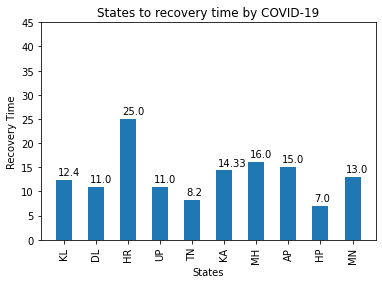

In [100]:
States = ['KL', 'DL', 'TG', 'RJ', 'HR', 'UP', 'LA', 'TN', 'JK', 'KA', 'MH', 'PB', 'AP', 'UT', 'OR', 'PY', 'WB', 'CH', 'CT', 'GJ', 'HP', 'MP', 'BR', 'MN', 'MZ', 'GA', 'AN', 'JH', 'AS', 'AR', 'DN', 'TR', 'TBD']
def getRecoveryTimewrtStates():
    data = getJsonfromUrl(raw_data_Link)
    data = preProcessAgeGroup(data)
    CumulativeRecoveryTimeToState = array.array('i',[0]*len(States))
    NoOfPeopleRecoveredToState = array.array('i',[0]*len(States))
    recTimewrtStates= []
    for element in data['raw_data']:
            if element['currentstatus'] == 'Recovered':
                dayDifference = getDayDifference(element['dateannounced'],element['statuschangedate'])
                if (dayDifference > 0):
                    if element['statecode']:
                        NoOfPeopleRecoveredToState[States.index(element['statecode'])] += 1
                        CumulativeRecoveryTimeToState[States.index(element['statecode'])] += dayDifference
                    else:
                        NoOfPeopleRecoveredToState[States.index('TBD')] += 1
                        CumulativeRecoveryTimeToState[States.index('TBD')] += dayDifference
    print("Recovery Time wrt States:{} People in a States:{}".format(CumulativeRecoveryTimeToState,NoOfPeopleRecoveredToState))
    for (cumRecTime,countOfPeople) in zip(CumulativeRecoveryTimeToState,NoOfPeopleRecoveredToState):
        if countOfPeople > 0:
            recTimewrtStates.append(round((cumRecTime/countOfPeople),2))
        else:
            recTimewrtStates.append(-1)
    return recTimewrtStates

def plot(arr,ticks,xLabel=None,yLabel=None,title=None,imageFileName=None):
    
    
    x = [i for i in range(0,len(ticks))]
    
    tick_label = ticks

    # plotting a bar chart 
    plt.bar(x, arr, tick_label = tick_label, 
            width = 0.5)
    plt.xticks(x, tick_label, rotation='vertical')
#    plt.plot(x, arr, color='green', linestyle='dashed', linewidth = 1, 
 #            marker='o', markersize=2)

    for i,j in zip(x,arr):
        plt.annotate(str(j),xy=(i-0.2,j+1))

    plt.ylim(0,max(arr) + 20)

    if xLabel:
        plt.xlabel(xLabel)
    else: 
        plt.xlabel('States') 
    
    if yLabel:
        plt.ylabel(yLabel)
    else:
        plt.ylabel('Recovery Time') 

    if title:
        plt.title(title)
    else:
        plt.title('States to recovery time by COVID-19')
    
    if imageFileName:
        plt.savefig(imageFileName+".png")
    else:
        plt.savefig('recoveryTimeWrtStates.png')
    # function to show the plot 
    plt.show() 

    
def plotRecTimeWrtStates():
    recTimewrtStates = getRecoveryTimewrtStates()
    StatesListNonZero = []
    recTimewrtStatesNonZero = []
    for i,num in enumerate(recTimewrtStates):
        if not num == -1:
            StatesListNonZero.append(States[i])
            recTimewrtStatesNonZero.append(num)
    print("States List:{} Recovery Times:{}".format(StatesListNonZero,recTimewrtStatesNonZero))      
    plot(recTimewrtStatesNonZero,StatesListNonZero)
    
plotRecTimeWrtStates()  

In [102]:
data = getJsonfromUrl(raw_data_Link)
CumulativeRecoveryTimeToState = array.array('i',[0]*len(States))
NoOfPeopleRecoveredToState = array.array('i',[0]*len(States))
recTimewrtStates= []
for element in data['raw_data']:
        if element['currentstatus'] == 'Recovered' and element['statecode'] == 'HR':
            print(element['dateannounced'],element['statuschangedate'])
            print(getDayDifference(element['dateannounced'],element['statuschangedate']))

04/03/2020 29/03/2020
25
04/03/2020 29/03/2020
25
04/03/2020 29/03/2020
25
04/03/2020 29/03/2020
25
04/03/2020 29/03/2020
25
04/03/2020 29/03/2020
25
04/03/2020 29/03/2020
25
04/03/2020 29/03/2020
25
04/03/2020 29/03/2020
25
04/03/2020 29/03/2020
25
04/03/2020 29/03/2020
25
04/03/2020 29/03/2020
25


20
45
24
69
55
55
55
55
55
55
55
55
55
55
55
55
55
55
70
45
16
27
59
65
75
45
24
54
53
65
61
25
63
3
48
40
13
96
89
3
85
46
70
68
27
69
26
76
65
45
33
33
27
37
59
43
21
24
59
46
32
45
47
42
33
3
44
51
31
29
20
67
63
49
26
68
52
22
18
34
28
25
22
56
25
27
44
20
68
35
21
50
67
33
30
3
38
23
22
49
35
24
24
21
70
47
32
21
51
19
65
22
22
32
22
69
58
24
38
20
22
34
47
37
35
20
41
18
69
27
26
52
21
52
27
2
63
32
59
45
22
24
27
60
32
53
20
23
42
74
28
59
63
41
24
26
32
38
67
26
53
39
19
35
33
69
75
65
35
34
45
40
17
36
60
54
21
35
23
57
59
22
24
31
30
33
32
30
21
60
64
35
25
38
24
81
26
58
27
32
41
33
26
34
23
23
50
22
32
24
41
27
69
21
64
36
27
51
37
62
48
47
20
53
64
43
49
36
46
45
58
57
27
29
24
33
49
46
61
85
21
30
23
21
20
25
56
32
49
24
30
31
41
34
40
37
47
34
21
50
32
27
33
32
27
34
52
26
61
56
38
41
30
24
60
22
38
45
45
69
2
25
25
48
54
24
35
41
23
32
40
65
56
65
53
54
58
74
52
25
49
39
61
56
47
55
65
57
47
57
70
23
25
65
55
25
64
36
75
57
65
36
50
57
27
39
38
63
34
21
22
23
37
37
63
5

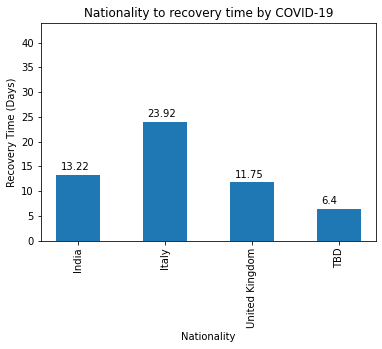

In [105]:
Country = ['India', 'Italy', 'Canada', 'United Kingdom', 'Phillipines', 'Indonesia', 'TBD', 'Thailand', 'United States of America', 'Tibet', 'Malaysia', 'Myanmar']
def getRecoveryTimewrtC():
    data = getJsonfromUrl(raw_data_Link)
    data = preProcessAgeGroup(data)
    CumulativeRecoveryTimeToC = array.array('i',[0]*len(Country))
    NoOfPeopleRecoveredToC = array.array('i',[0]*len(Country))
    recTimewrtC= []
    for element in data['raw_data']:
            if element['currentstatus'] == 'Recovered':
                dayDifference = getDayDifference(element['dateannounced'],element['statuschangedate'])
                if (dayDifference > 0):
                    if element['nationality']:
                        NoOfPeopleRecoveredToC[Country.index(element['nationality'])] += 1
                        CumulativeRecoveryTimeToC[Country.index(element['nationality'])] += dayDifference
                    else:
                        NoOfPeopleRecoveredToC[Country.index('TBD')] += 1
                        CumulativeRecoveryTimeToC[Country.index('TBD')] += dayDifference
    print("Recovery Time wrt nationality:{} People in a nationality:{}".format(CumulativeRecoveryTimeToC,NoOfPeopleRecoveredToC))
    for (cumRecTime,countOfPeople) in zip(CumulativeRecoveryTimeToC,NoOfPeopleRecoveredToC):
        if countOfPeople > 0:
            recTimewrtC.append(round((cumRecTime/countOfPeople),2))
        else:
            recTimewrtC.append(-1)
    return recTimewrtC

def plot(arr,ticks,xLabel=None,yLabel=None,title=None,imageFileName=None):
    
    
    x = [i for i in range(0,len(ticks))]
    
    tick_label = ticks

    # plotting a bar chart 
    plt.bar(x, arr, tick_label = tick_label, 
            width = 0.5)
    plt.xticks(x, tick_label, rotation='vertical')
#    plt.plot(x, arr, color='green', linestyle='dashed', linewidth = 1, 
 #            marker='o', markersize=2)

    for i,j in zip(x,arr):
        plt.annotate(str(j),xy=(i-0.2,j+1))

    plt.ylim(0,max(arr) + 20)

    if xLabel:
        plt.xlabel(xLabel)
    else: 
        plt.xlabel('Nationality') 
    
    if yLabel:
        plt.ylabel(yLabel)
    else:
        plt.ylabel('Recovery Time (Days)') 

    if title:
        plt.title(title)
    else:
        plt.title('Nationality to recovery time by COVID-19')
    
    if imageFileName:
        plt.savefig(imageFileName+".png")
    else:
        plt.savefig('recoveryTimeWrtNationality.png')
    # function to show the plot 
    plt.show() 

    
def plotRecTimeWrtC():
    recTimewrtC = getRecoveryTimewrtC()
    CListNonZero = []
    recTimewrtCNonZero = []
    for i,num in enumerate(recTimewrtC):
        if not num == -1:
            CListNonZero.append(Country[i])
            recTimewrtCNonZero.append(num)
    print("States List:{} Recovery Times:{}".format(CListNonZero,recTimewrtCNonZero))      
    plot(recTimewrtCNonZero,CListNonZero)
    
plotRecTimeWrtC()  

In [103]:
a=['Kerala', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana', 'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu and Kashmir', 'Karnataka', 'Maharashtra', 'Punjab', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram', 'Goa', 'Andaman and Nicobar Islands', 'Jharkhand', 'Assam', 'Arunachal Pradesh', 'Dadra and Nagar Haveli', 'Tripura', '']
data = getJsonfromUrl(raw_data_Link)
data = preProcessAgeGroup(data)
g = []
for element in data['raw_data']:
    if element['nationality'] == ""
        g.append(element['nationality'])
print("No of states:{}".format(len(g)))
print(g)

20
45
24
69
55
55
55
55
55
55
55
55
55
55
55
55
55
55
70
45
16
27
59
65
75
45
24
54
53
65
61
25
63
3
48
40
13
96
89
3
85
46
70
68
27
69
26
76
65
45
33
33
27
37
59
43
21
24
59
46
32
45
47
42
33
3
44
51
31
29
20
67
63
49
26
68
52
22
18
34
28
25
22
56
25
27
44
20
68
35
21
50
67
33
30
3
38
23
22
49
35
24
24
21
70
47
32
21
51
19
65
22
22
32
22
69
58
24
38
20
22
34
47
37
35
20
41
18
69
27
26
52
21
52
27
2
63
32
59
45
22
24
27
60
32
53
20
23
42
74
28
59
63
41
24
26
32
38
67
26
53
39
19
35
33
69
75
65
35
34
45
40
17
36
60
54
21
35
23
57
59
22
24
31
30
33
32
30
21
60
64
35
25
38
24
81
26
58
27
32
41
33
26
34
23
23
50
22
32
24
41
27
69
21
64
36
27
51
37
62
48
47
20
53
64
43
49
36
46
45
58
57
27
29
24
33
49
46
61
85
21
30
23
21
20
25
56
32
49
24
30
31
41
34
40
37
47
34
21
50
32
27
33
32
27
34
52
26
61
56
38
41
30
24
60
22
38
45
45
69
2
25
25
48
54
24
35
41
23
32
40
65
56
65
53
54
58
74
52
25
49
39
61
56
47
55
65
57
47
57
70
23
25
65
55
25
64
36
75
57
65
36
50
57
27
39
38
63
34
21
22
23
37
37
63
5